<a href="https://colab.research.google.com/github/mariyamjabir/Drug-Review-Analysis-Understanding-User-Sentiment/blob/main/Drug_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Review Analysis: Understanding User Sentiment

In recent years, sentiment analysis has emerged as a valuable tool for extracting insights from user-generated content, particularly in the pharmaceutical domain. The goal is to gain a comprehensive understanding of user sentiment, identify prominent drugs, and explore the prevalence of various medical conditions.This project delves into the analysis of the "Drug Review Dataset", accessible from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com).



In [ ]:
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
os.listdir('/content/drive/MyDrive/Drug_Review')

['drugsComTrain_raw.tsv', 'drugsComTest_raw.tsv']

In [ ]:
file_path = '/content/drive/MyDrive/Drug_Review/drugsComTrain_raw.tsv'
dataset = pd.read_csv(file_path, sep='\t')

In [ ]:
dataset

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [ ]:
dataset.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [ ]:
columns_to_drop = ['Unnamed: 0', 'date']
dataset.drop(columns=columns_to_drop, inplace=True)


In [ ]:
dataset.isna().sum()

drugName         0
condition      899
review           0
rating           0
usefulCount      0
dtype: int64

### Exploratory Data Analysis(EDA)

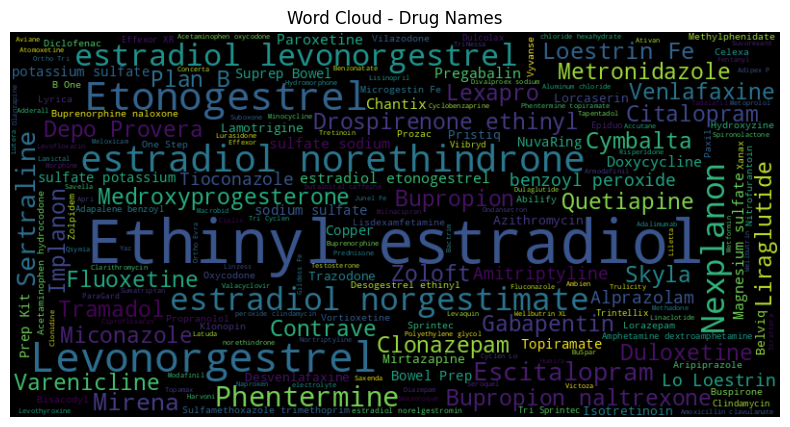

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_medicines = ' '.join(dataset['drugName'])

wordcloud =  WordCloud(width=800, height=400, background_color='black', stopwords=None).generate(all_medicines)

plt.figure(figsize=(10, 5))
plt.title('Word Cloud - Drug Names')
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

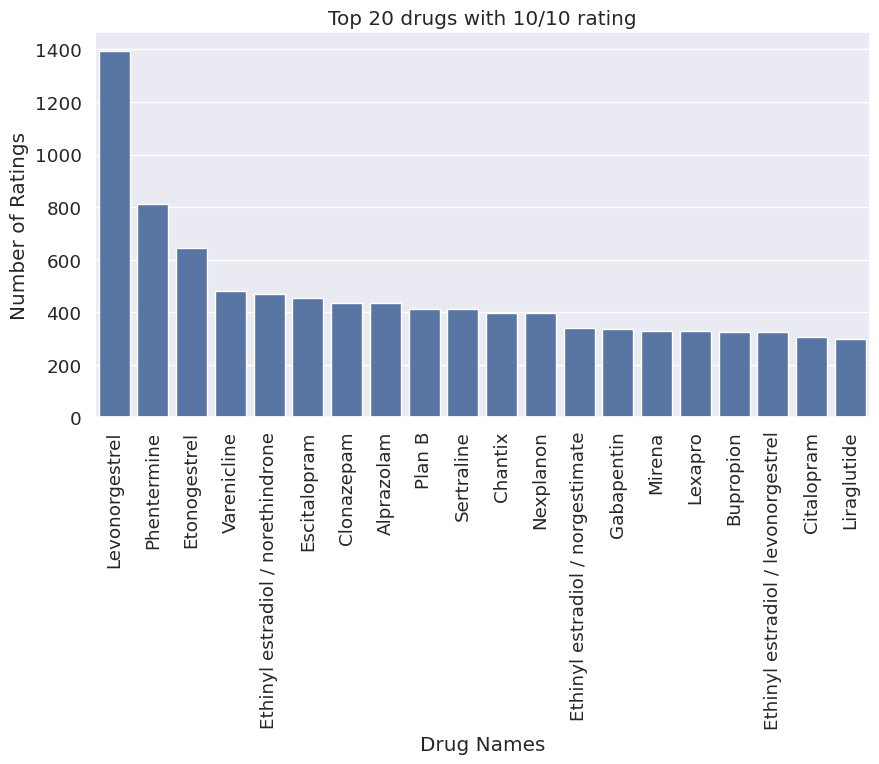

In [ ]:
# Top 20 drugs with rating 10

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 5]

rating = dict(dataset.loc[dataset.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

From the top 20 drugs with 10/10 rating, "Levonorgestrel" is the drug with highest number of rating (about 1390).

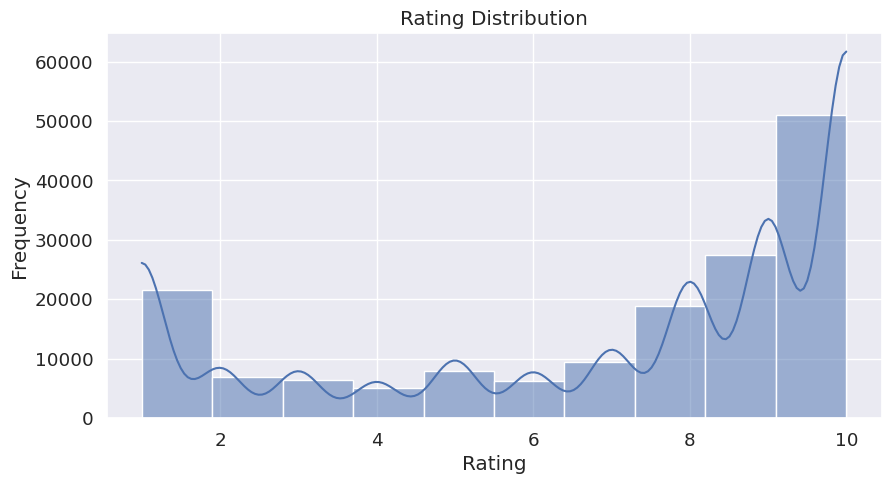

In [ ]:
plt.show()
plt.figure(figsize=(10,5))
sns.histplot(dataset['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


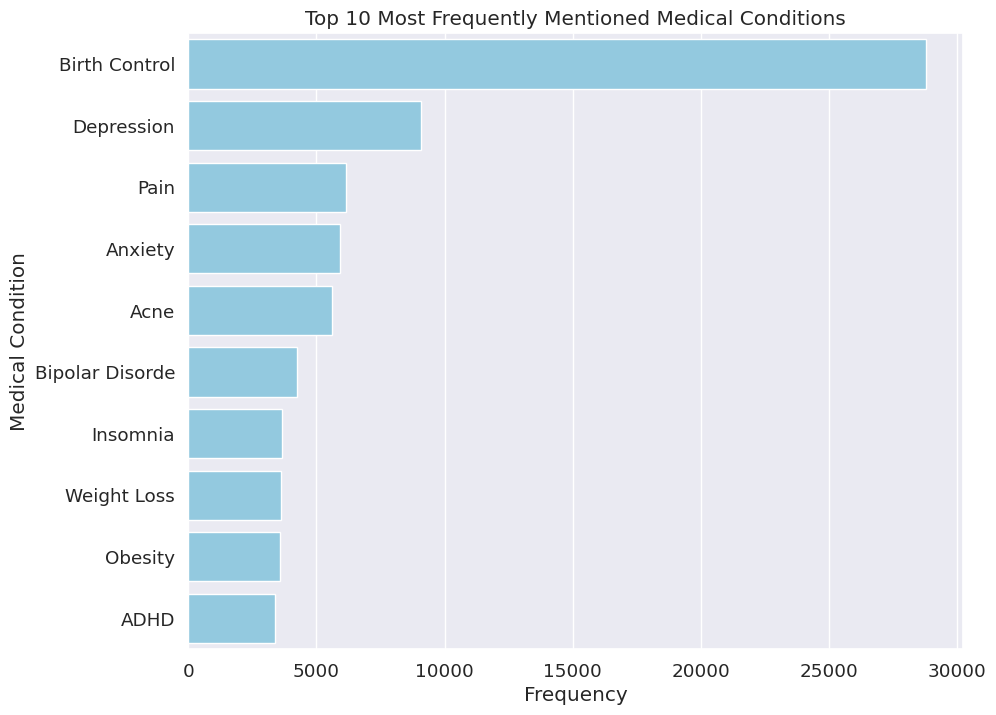

In [ ]:
# Occurrences of each medical condition
condition_counts = dataset['condition'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=condition_counts, y=condition_counts.index, color='skyblue')
plt.title('Top 10 Most Frequently Mentioned Medical Conditions')
plt.xlabel('Frequency')
plt.ylabel('Medical Condition')
plt.show()

"Birth Control" is the most frequently mentioned medical condition, indicating a high prevalence of discussions related to contraception methods.
"Depression","Pain", and "Anxiety" are also highly mentioned, highlighting the significance of mental health and pain-related concerns in the dataset.

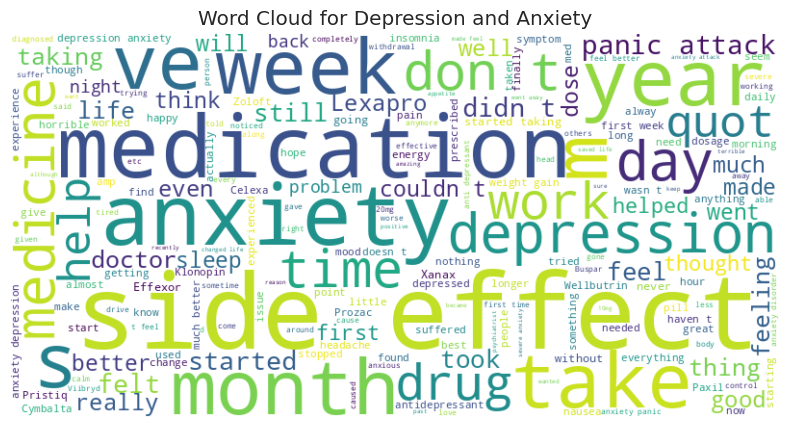

In [ ]:
depression_reviews = ' '.join(dataset[dataset['condition'] == 'Depression']['review'].dropna())
anxiety_reviews = ' '.join(dataset[dataset['condition'] == 'Anxiety']['review'].dropna())
combined_reviews = f"{depression_reviews} {anxiety_reviews}"

wordcloud_filtered = ' '.join([word for word in combined_reviews.split() if len(word) > 3])

wordcloud_combined = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(wordcloud_filtered)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Depression and Anxiety')
plt.show()


The term "side effect" is prominently featured in the reviews, suggesting that individuals discussing depression and anxiety often express concerns or experiences related to the side effects of medications. This emphasizes the importance of understanding and managing potential adverse effects in the treatment of mental health conditions.

The high frequency of the word "medication" underscores the central role of pharmaceutical interventions in addressing depression and anxiety.

Unsurprisingly, the term "anxiety" itself is a prevalent word, indicating that individuals express their feelings, struggles, and coping mechanisms directly related to anxiety.The prevalence of the term "anxiety" underscores the emotional dimension of mental health struggles, shedding light on the diverse and complex aspects of patient experiences.



### Feature Engineering

In [ ]:
dataset.loc[dataset['rating'] >= 5, 'Rating Point'] = 1
dataset.loc[dataset['rating'] < 5, 'Rating Point'] = 0

rating_counts = dataset['Rating Point'].value_counts()
print(rating_counts)


1.0    121222
0.0     40075
Name: Rating Point, dtype: int64


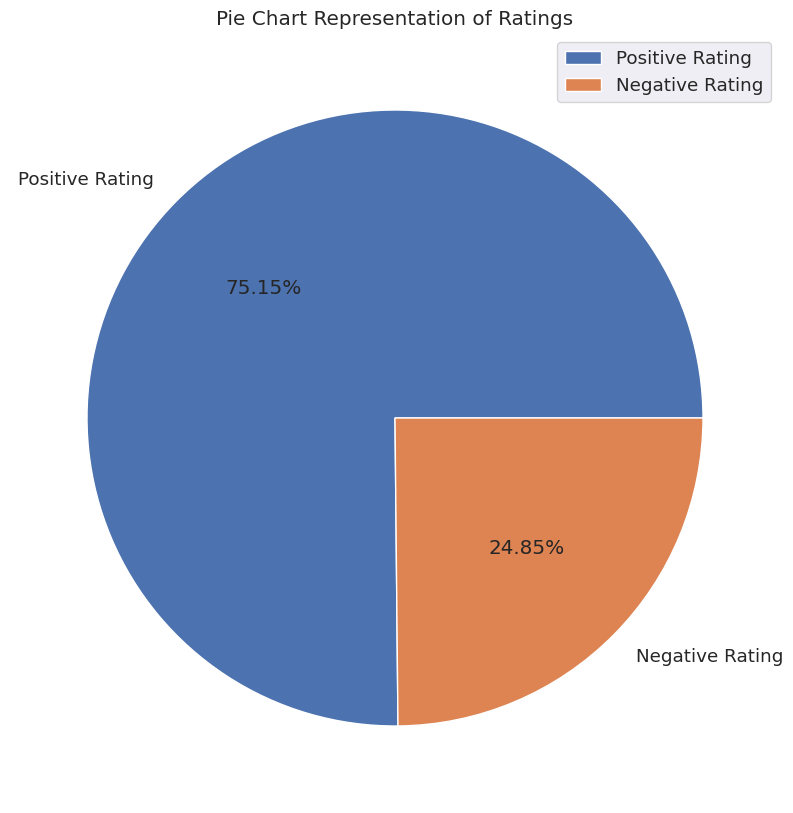

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(rating_counts, labels=['Positive Rating', 'Negative Rating'],
         autopct='%.2f%%')
plt.title('Pie Chart Representation of Ratings')
plt.legend()
plt.show()


### Data Preprocessing

In [ ]:
print(dataset['rating'].describe())

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset_stage2 = dataset.copy()

# apply the transformation on the new DataFrame
dataset_stage2.loc[:, 'rating'] = scaler.fit_transform(dataset_stage2[['rating']])

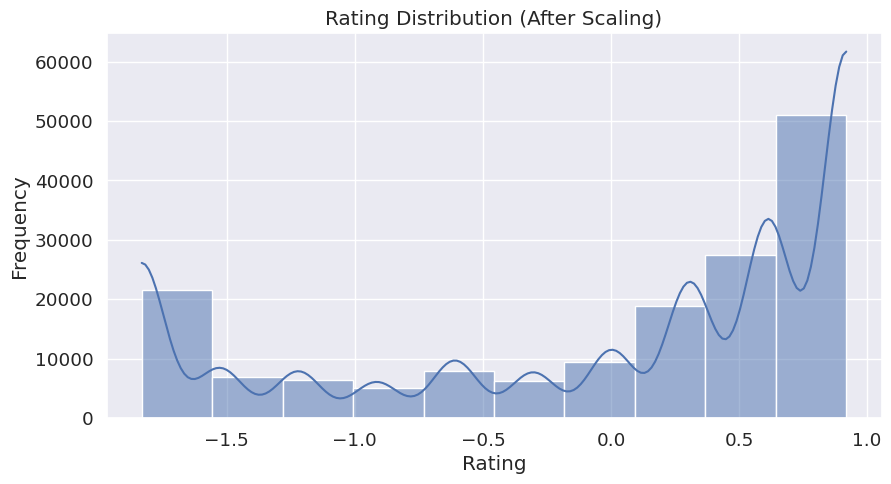

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(dataset_stage2['rating'], bins=10, kde=True)
plt.title('Rating Distribution (After Scaling)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
condition_counts = dataset_stage2['condition'].value_counts()
condition_counts

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [ ]:
frequent_conditions = condition_counts[condition_counts > 5000]
print(frequent_conditions)

Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: condition, dtype: int64


In [ ]:
dataset_stage2

,drugName,condition,review,rating,usefulCount,Rating Point
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",0.612906,27,1.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",0.307312,192,1.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",-0.609469,17,1.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",0.307312,10,1.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",0.612906,37,1.0
...,...,...,...,...,...,...
161292,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",0.918499,125,1.0
161293,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",-1.831844,34,0.0
161294,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",-1.526250,35,0.0
161295,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",0.918499,79,1.0


In [ ]:
conditions_to_keep = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']
filtered_data = dataset_stage2[dataset_stage2['condition'].isin(conditions_to_keep)]
features_to_keep = ['drugName', 'condition', 'review', 'rating','Rating Point']
filtered_data = dataset_stage2[dataset_stage2['condition'].isin(conditions_to_keep)][features_to_keep]

In [ ]:
feature_counts = filtered_data.count()
print(feature_counts)

drugName        55494
condition       55494
review          55494
rating          55494
Rating Point    55494
dtype: int64


In [ ]:
dataset_stage3= filtered_data[['review', 'condition', 'rating']]

In [ ]:
dataset_stage3

,review,condition,rating
2,"""I used to take another oral contraceptive, wh...",Birth Control,-0.609469
3,"""This is my first time using any form of birth...",Birth Control,0.307312
9,"""I had been on the pill for many years. When m...",Birth Control,0.307312
11,"""I have taken anti-depressants for years, with...",Depression,0.918499
14,"""Started Nexplanon 2 months ago because I have...",Birth Control,-1.220656
...,...,...,...
161273,"""I have had the Nexplanon since Dec. 27, 2016 ...",Birth Control,-0.303875
161276,"""About 4 years ago I started having early-morn...",Anxiety,0.307312
161286,"""This is the third med I&#039;ve tried for anx...",Depression,-1.526250
161287,"""I was super against taking medication. I&#039...",Anxiety,0.612906


In [ ]:
dataset_stage3.reset_index(drop=True,inplace=True)

In [ ]:
dataset_stage3.isna().sum()

review       0
condition    0
rating       0
dtype: int64

###Text Processing
- Tokenization
- Stemming
- Lemmatization
- Stopwords removal from review column

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
tokenized_reviews = dataset_stage3['review'].apply(lambda x: word_tokenize(x))

In [ ]:
stemmed_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
lemmatized_reviews = stemmed_reviews.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
filtered_reviews = lemmatized_reviews.apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
dataset_stage3.loc[:, 'review'] = filtered_reviews.apply(lambda x: ' '.join(x))

<ipython-input-37-f90d28de6360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_stage3.loc[:, 'review'] = filtered_reviews.apply(lambda x: ' '.join(x))


In [ ]:
dataset_stage3

,review,condition,rating
0,"`` use take anoth oral contracept , 21 pill cy...",Birth Control,-0.609469
1,`` thi first time use ani form birth control ....,Birth Control,0.307312
2,"`` pill mani year . doctor chang rx chateal , ...",Birth Control,0.307312
3,"`` taken anti-depress year , improv mostli mod...",Depression,0.918499
4,`` start nexplanon 2 month ago becaus minim am...,Birth Control,-1.220656
...,...,...,...
55489,"`` nexplanon sinc dec. 27 , 2016 got first per...",Birth Control,-0.303875
55490,`` 4 year ago start early-morn awakening/insom...,Anxiety,0.307312
55491,`` thi third med & # 039 ; tri anxieti mild de...,Depression,-1.526250
55492,`` wa super take medic . & # 039 ; start deal ...,Anxiety,0.612906


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

### Encoding

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(dataset_stage3['condition'])

### Data Preprocessing for Test Data

In [ ]:
test_file_path = '/content/drive/MyDrive/Drug_Review/drugsComTrain_raw.tsv'
test_dataset = pd.read_csv(test_file_path, sep='\t')

In [ ]:
test_conditions = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne']
test_data = test_dataset[test_dataset['condition'].isin(test_conditions)].copy()

In [ ]:
test_data.reset_index(drop=True,inplace=True)

In [ ]:
test_data.isna().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [ ]:
test_data['condition'] = label_encoder.transform(test_data['condition'])

In [ ]:
test_tokenized_reviews = test_data['review'].apply(lambda x: word_tokenize(x))
test_stemmed_reviews = test_tokenized_reviews.apply(lambda x: [stemmer.stem(word) for word in x])
test_lemmatized_reviews = test_stemmed_reviews.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
test_filtered_reviews = test_lemmatized_reviews.apply(lambda x: [word for word in x if word.lower() not in stop_words])
test_data.loc[:, 'review'] = test_filtered_reviews.apply(lambda x: ' '.join(x))

## Model Selection

### 1. Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_stage3['review'], labels, test_size=0.2, random_state=42)

# Pipeline that first creates bag of word representation then applies the classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),
])

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1075
           1       0.91      0.80      0.85      1184
           2       0.96      0.99      0.98      5696
           3       0.89      0.91      0.90      1869
           4       0.95      0.94      0.95      1275

    accuracy                           0.94     11099
   macro avg       0.94      0.91      0.92     11099
weighted avg       0.94      0.94      0.94     11099



In [ ]:
# Use the model to predict sentiments for the test data
test_predictions_randomforest = model.predict(test_data['review'])

# Convert the probabilities to class labels
predicted_labels_randomforest = [np.argmax(prediction) for prediction in test_predictions_randomforest]

In [ ]:
# Convert the numeric labels back to original classes
predicted_conditions_randomforest = label_encoder.inverse_transform(predicted_labels_randomforest)
actual_conditions = label_encoder.inverse_transform(test_data['condition'])

results = pd.DataFrame({'Predicted Condition': predicted_conditions_randomforest, 'Actual Condition': actual_conditions})

print(results.head())

  Predicted Condition Actual Condition
0                Acne    Birth Control
1                Acne    Birth Control
2                Acne    Birth Control
3                Acne       Depression
4                Acne    Birth Control


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 0.9444094062528156
Precision: 0.9442214337506133
Recall: 0.9444094062528156
F1 Score: 0.9435631592020355


### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Create a pipeline that first creates bag of word representation then applies the classifier
model1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])


model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1075
           1       0.94      0.42      0.58      1184
           2       0.86      1.00      0.92      5696
           3       0.73      0.85      0.79      1869
           4       0.98      0.77      0.86      1275

    accuracy                           0.86     11099
   macro avg       0.90      0.75      0.79     11099
weighted avg       0.87      0.86      0.84     11099



In [ ]:
# Use the model to predict sentiments for the test data
test_predictions_multiNB = model1.predict(test_data['review'])

# Convert the probabilities to class labels
predicted_labels_multiNB = [np.argmax(prediction) for prediction in test_predictions_multiNB]

In [ ]:
predicted_conditions_multiNB = label_encoder.inverse_transform(predicted_labels_multiNB)

results = pd.DataFrame({'Predicted Condition': predicted_conditions_multiNB, 'Actual Condition': actual_conditions})

# Print the dataframe
print(results.head())

  Predicted Condition Actual Condition
0                Acne    Birth Control
1                Acne    Birth Control
2                Acne    Birth Control
3                Acne       Depression
4                Acne    Birth Control


In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 0.855392377691684
Precision: 0.8706933593521294
Recall: 0.855392377691684
F1 Score: 0.8448062483786899


###Random Review Prediction and Model Comparison

In [ ]:
# Select a random review and its corresponding condition from the test data
random_index = np.random.choice(test_data.index)
random_review = test_data.loc[random_index, 'review']
actual_condition_test = label_encoder.inverse_transform([test_data.loc[random_index, 'condition']])

print("Original review: \n", random_review)

# Use the model to predict the sentiment of this review
prediction_randomforest = model.predict([random_review])
prediction_multi = model1.predict([random_review])

# The output of the model is the predicted class label
predicted_condition_random = label_encoder.inverse_transform([prediction_randomforest])
predicted_condition_multi = label_encoder.inverse_transform([prediction_multi])

print("\nActual condition: ", actual_condition_test)
print(" Random Forest Predicted condition: ", predicted_condition_random)
print(" MultiNB Predicted condition: ", predicted_condition_multi)

Original review: 
 `` tri variou birth control w horribl side effect decid give thi tri bc hormon . insert wa uncomfort , pain . spot first week , expect . & # 039 ; back normal . & # 039 ; never kid & # 039 ; want thi wa last resort birth control . onli wish known thi option year ago ! ! ! ! ''

Actual condition:  ['Birth Control']
 Random Forest Predicted condition:  ['Birth Control']
 MultiNB Predicted condition:  ['Birth Control']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
